In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def displayColorImage(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

In [4]:
def convolve(gray, kernel):
#Get the original height and width of image
    (iHeight, iWidth) = gray.shape[:2]

#Get height and width of kernel
    (kHeight, kWidth) = kernel.shape[:2]
 
	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced

# compute padding size
    pad = (kWidth - 1) // 2

#Inflate image size before applying convolution with padding so that 
#image size remains same as original even after applying padding
    image = cv2.copyMakeBorder(gray, pad, pad, pad, pad,
            cv2.BORDER_REPLICATE)
    
    output = np.zeros((iHeight, iWidth), dtype="float32")
    
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    #slide kernel from top to bottom
    for y in np.arange(pad, iHeight + pad):
    #slide kernel from left to right
        for x in np.arange(pad, iWidth + pad):
            #get area of image which has same size of kernet
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            # perform element-wise multiplicate between the ROI and
            # the kernel, then calculate sum
            k = (roi * kernel).sum()
             # store the convolved value in the output
            output[y - pad, x - pad] = k
    return output

In [5]:
def applyConvolution(image, kernel, title):
    convoleOutput = convolve(gray, kernel)
    #opencvOutput = cv2.filter2D(image, -1, kernel)
    displayGrayScaleImage(convoleOutput,title)

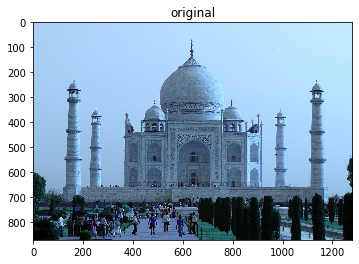

In [6]:
image = cv2.imread("./data/tajmahal.jpg")
displayColorImage(image,"original")

(872, 1280)


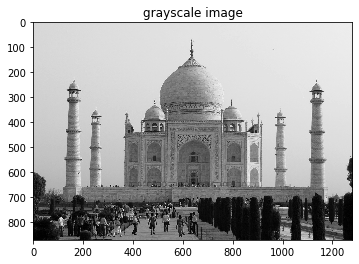

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
displayGrayScaleImage(gray, "grayscale image")

In [8]:
# define Basic kernels
blur = np.array([[0.0625, 0.125, 0.0625],
                 [0.125, 0.25, 0.125],
                 [0.0625, 0.125, 0.0625]   
                ])


emboss = np.array([[-2, -2, 0],
                   [-1, 1, 1],
                   [0, 1, 2]   
                  ])

outline = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]   
                ])

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]   
                   ])

smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))




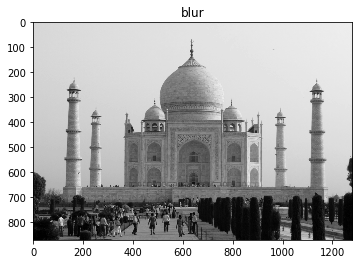

In [9]:
#apply blur
#The blur kernel de-emphasizes differences in adjacent pixel values.
applyConvolution(gray, blur, "blur")

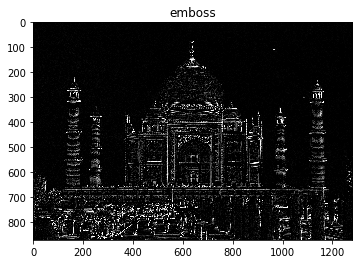

In [10]:
#apply emboss
applyConvolution(gray, emboss, "emboss")

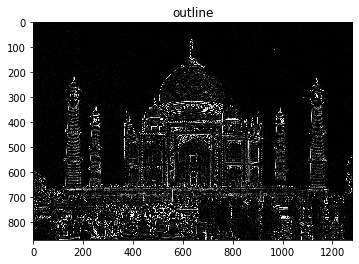

In [11]:
#apply outline
applyConvolution(gray, outline, "outline")

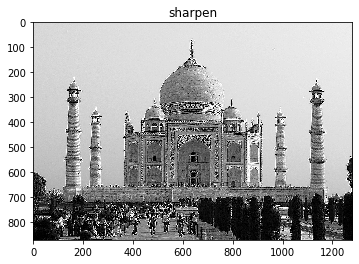

In [12]:
#apply sharpen
applyConvolution(gray, sharpen, "sharpen")

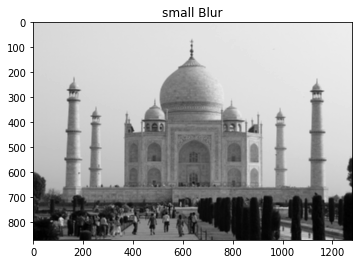

In [13]:
#apply small blur
applyConvolution(gray, smallBlur, "small Blur")

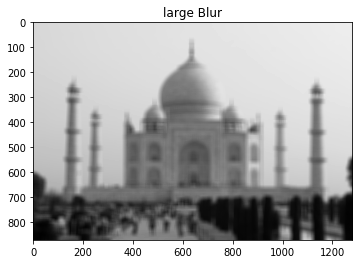

In [14]:
#apply large blur
applyConvolution(gray, largeBlur, "large Blur")

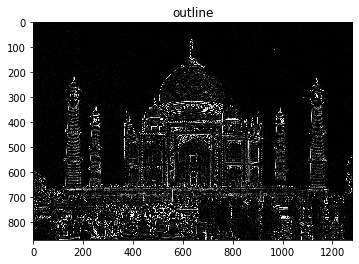

In [15]:
#apply large blur
applyConvolution(gray, outline, "outline")

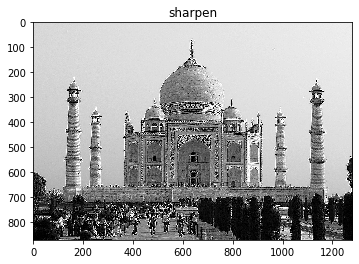

In [16]:
#apply large blur
applyConvolution(gray, sharpen, "sharpen")

In [17]:
#advanced kernels

 
# construct the Sobel x-axis kernel
sobel_top = np.array((
	[1, 2, 1],
	[0, 0, 0],
	[-1, -2, -1]), dtype="int")
 
# construct the Sobel y-axis kernel
sobel_bottom = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobel_left = np.array((
	[1, 0, -1],
	[2, 0, -2],
	[1, 0, -1]), dtype="int")


# construct the Sobel y-axis kernel
sobel_right = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

### sobel kernels are used to show only the differences in adjacent pixel values in a particular direction.

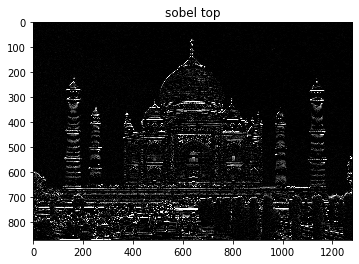

In [18]:
#apply kernels
applyConvolution(gray, sobel_top, "sobel top")

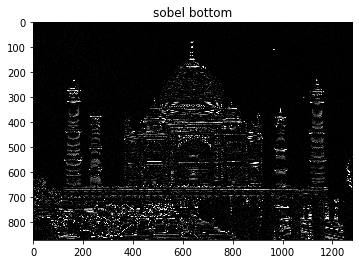

In [19]:
#apply kernels
applyConvolution(gray, sobel_bottom, "sobel bottom")

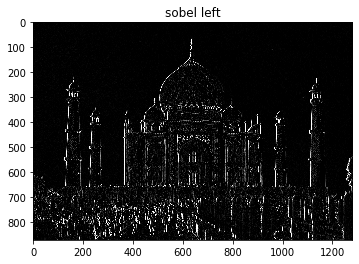

In [20]:
#apply kernels
applyConvolution(gray, sobel_left, "sobel left")

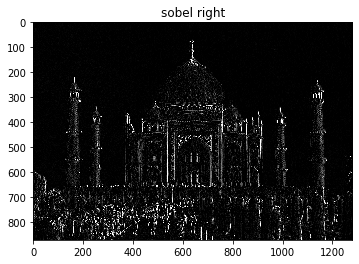

In [21]:
#apply kernels
applyConvolution(gray, sobel_right, "sobel right")